## Workflow of hernan-lab-to-nwb package
The purpose of this package is to read various sources and types of data and to wrangle them to the NWB format, specifically after you have collected data and before you have processed data!!! (SEE PICTURE)

Additional changes to NWB would require specific user requirements. For example, if you were to segment your calcium imaging data into ROIs, you could add ROI masks to the NWB file, but this code won't do that. 

This should be run after collecting data!

Requirements:
1. Anaconda3
2. VScode or Spyder (code written in VScode, would recommend)

Installation:
1. conda create -n decode_lab_env python=3.9
2. conda activate decode_lab_env
3. git clone https://github.com/JohnStout/hernan-lab-to-nwb
4. cd decode_lab_code
5. pip install - e.

<img src="/Users/js0403/hernan-lab-to-nwb/tests/idealized workflow.png" />

----
# Neuralynx
Below can be changed as needed to create your nwb files

In [ ]:
# load packages
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.utils import nwb_utils

# Define folder path
folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS' # folder path

# Read data
ephys_object = ioreaders.read_nlx(folder_path) # we first instantiate the object
ephys_object.read_ephys() # read data

# Edit pandas array dynamically
ephys_object.csc_grouping_table = nwb_utils.pandas_excel_interactive(dir = ephys_object.folder_path, df = ephys_object.csc_grouping_table)
ephys_object.tt_grouping_table = nwb_utils.pandas_excel_interactive(dir = ephys_object.folder_path, df = ephys_object.tt_grouping_table)

# write file
ephys_object.write_nwb()

Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Working with TT
Detected clustered data in TT1_FILTERED_clustered.ntt
Detected clustered data in TT3_FILTERED_Clustered.ntt
Detected clustered data in TT4_FILTERED_Clustered.ntt
File saved to  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwb_excel_sheet.xlsx
File saved to  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwb_excel_sheet.xlsx
nwb_template.xlsx written to /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS
Removing:
 1    TT1_filtered.ntt
2    TT2_filtered.ntt
4    TT3_filtered.ntt
6    TT4_filtered.ntt
Name: Name, dtype: object Series([], Name: Name, dtype: object)
This make take a few moments if working with a lot of CSC data...
Save .nwb file to:  /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb
Validating /Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb against cac

#### PROOF OF CONVERSION: Pynapple is lovely for loading the NWB file

nwbfile
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys             │ Type        │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ units            │ TsGroup     │
│ epochs           │ IntervalSet │
│ ElectricalSeries │ TsdFrame    │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙
Unit data:
  Index    rate  quality    location
-------  ------  ---------  ----------
      0    5.85  good       PFC
      1    0.08  good       PFC
      2    2.02  good       PFC
      3    0.17  good       PFC
      4    0.7   good       PFC
      5    6.01  good       PFC
      6    8.05  good       PFC
      7    0.12  good       PFC
      8    0.35  good       PFC
      9    1.2   good       PFC
     10    0.07  good       PFC
     11    2.8   good       PFC
     12    0.14  good       PFC
     13    0.29  good       PFC
     14    0.72  good       PFC
     15    2.9   good       PFC
     16    0.06  good       PFC
     17    3.93  good       PFC
     18    0.76  good       PFC
     19    2.1   good       PFC
     20    1.53  goo

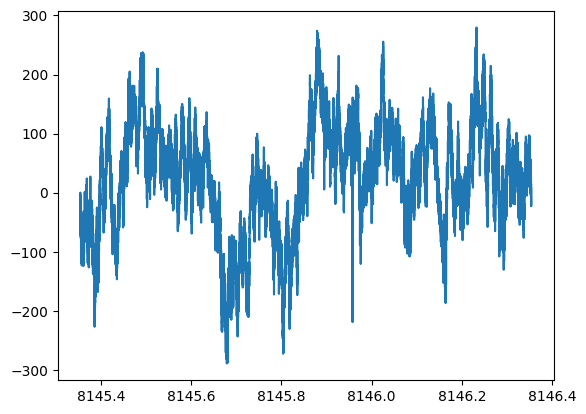

In [26]:
import pynapple as nap
import matplotlib.pyplot as plt

# load file and print output
data = nap.load_file('/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb')
print(data)

# print example of unit data
print("Unit data:")
print(data['units'])

# print example of LFP data
print("LFP data:")
print(data['ElectricalSeries'])

# plot signal
plt.plot(data['ElectricalSeries']['CSC1'][0:32000])

----
# UCLA Miniscope
Below can be changed to convert your miniscope data

In [1]:
# load packages
from hernan_lab_to_nwb.readers import ioreaders
from hernan_lab_to_nwb.utils import nwb_utils

# Define folder path - path to folder with all data inside
folder_path = '/Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49' # folder path

# instatiate object with directory
ophys_object = ioreaders.read_ophys(folder_path = folder_path)

# write to NWB - this is recommended rather than separately visualizing the datasets
ophys_object.miniscope_to_nwb()

This version does not support the experiment folder due to no testing data
File saved to  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/nwb_template.xlsx
This file does not handle multiple custom entries
/Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/miniscopeDeviceName/0.avi
Reading movie from:  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/miniscopeDeviceName/0.avi
Reading nwbfile from:  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/nwbfile.nwb
Rewriting nwbfile with recording 0
/Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/miniscopeDeviceName/1.avi
Reading movie from:  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/miniscopeDeviceName/1.avi
Reading nwbfile from:  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/nwbfile.nwb
Rewriting nwbfile with recording 1


#### PROOF OF CONVERSION: data from one recording sample
Note that when recording from the UCLA miniscope, the data is saved into chunks of 1000 timestamped frames. So the data will be 1000xNxN for each recording (unless you go under 1000 timestamped frames)

Reading nwbfile from:  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2023_11_14/13_21_49/nwbfile.nwb


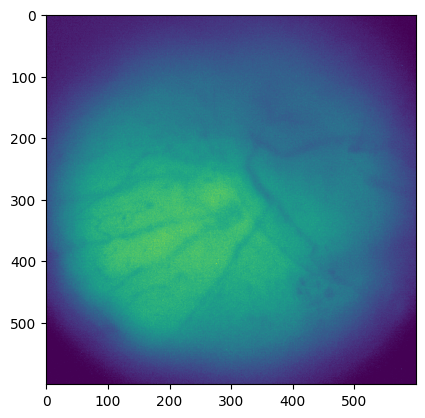

In [6]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
import matplotlib.pyplot as plt
with NWBHDF5IO(ophys_object.nwbpath, "r+") as io:
    print("Reading nwbfile from: ",(ophys_object.nwbpath))
    nwbfile = io.read()
    tester = nwbfile.acquisition['recording0'].data[:]
plt.imshow(tester[0,:,:])

# Pinnacle
Almost ready, needs updating on excel methods and addition of timestamps that account for start/stop times